In [ ]:
# Installing libraries will need
# In case "pip install" does not directly work for you, please use the following code below:
import sys
print(sys.executable)
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scikit-learn

In [1]:
# Installing libraries will need
pip install --upgrade pip
pip install matplotlib seaborn pandas numpy scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importing the relevant libraries that we will need 
import numpy as np # for linear algebra and calculations
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for data visualisation
import seaborn as sns # for data visualisation
import pickle # for saving our ML model

In [2]:
# Loading our dataset into pandas dataframe
df = pd.read_csv("Mall_Customers.csv")

In [3]:
# Checking for the shape of our dataset(number of rows and columns respectively)
df.shape

(200, 5)

In [4]:
# Checking the first 5 entries in our dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Getting a summary of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Checking for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# Summary Statistics of our dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
print(df["CustomerID"].unique())
print(len(df["CustomerID"].unique()))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
200


In [9]:
# Removing CustomerID 
df.drop(["CustomerID"], axis=1, inplace=True)

In [10]:
# Checking our dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [11]:
# Converting gender data from text to numbers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])

In [12]:
# Summary of our modified dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [13]:
# Previewing our modified dataset
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


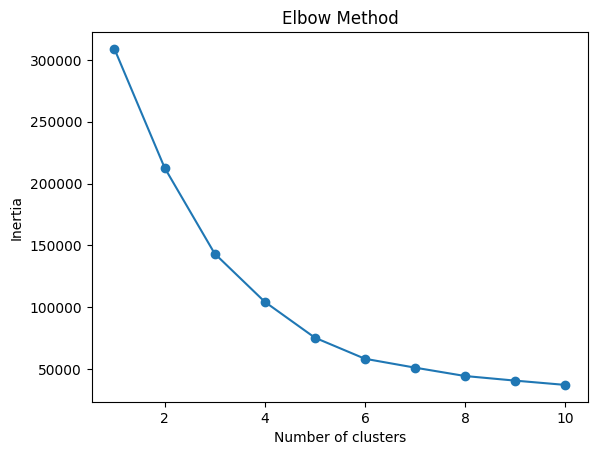

In [14]:
# Elbow analysis to determine an approximate optimal value of K - (which is the number of clusters we will use)
# Kmeans without feature scaling
from sklearn.cluster import KMeans
df
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 10000, random_state = 0, n_init = 10)
    kmeans = kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker = "o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [15]:
# Feature Scaling
cols = df.columns
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df = min_max.fit_transform(df)
print(df)

[[1.         0.01923077 0.         0.3877551 ]
 [1.         0.05769231 0.         0.81632653]
 [0.         0.03846154 0.00819672 0.05102041]
 [0.         0.09615385 0.00819672 0.7755102 ]
 [0.         0.25       0.01639344 0.39795918]
 [0.         0.07692308 0.01639344 0.76530612]
 [0.         0.32692308 0.02459016 0.05102041]
 [0.         0.09615385 0.02459016 0.94897959]
 [1.         0.88461538 0.03278689 0.02040816]
 [0.         0.23076923 0.03278689 0.7244898 ]
 [1.         0.94230769 0.03278689 0.13265306]
 [0.         0.32692308 0.03278689 1.        ]
 [0.         0.76923077 0.04098361 0.14285714]
 [0.         0.11538462 0.04098361 0.7755102 ]
 [1.         0.36538462 0.04098361 0.12244898]
 [1.         0.07692308 0.04098361 0.79591837]
 [0.         0.32692308 0.04918033 0.34693878]
 [1.         0.03846154 0.04918033 0.66326531]
 [1.         0.65384615 0.06557377 0.28571429]
 [0.         0.32692308 0.06557377 0.98979592]
 [1.         0.32692308 0.07377049 0.34693878]
 [1.         

In [16]:
# Converting df from matrix form to pandas dataframe
df = pd.DataFrame(df, columns=[cols])

In [17]:
# Previewing our modified dataset
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


In [18]:
# Summary of our modified dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   (Gender,)                  200 non-null    float64
 1   (Age,)                     200 non-null    float64
 2   (Annual Income (k$),)      200 non-null    float64
 3   (Spending Score (1-100),)  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [19]:
# Summary statistics of our modified dataset
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,0.400962,0.373443,0.502041
std,0.497633,0.268635,0.215285,0.263505
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.206731,0.217213,0.344388
50%,0.000000,0.346154,0.381148,0.500000
75%,1.000000,0.596154,0.516393,0.734694
max,1.000000,1.000000,1.000000,1.000000


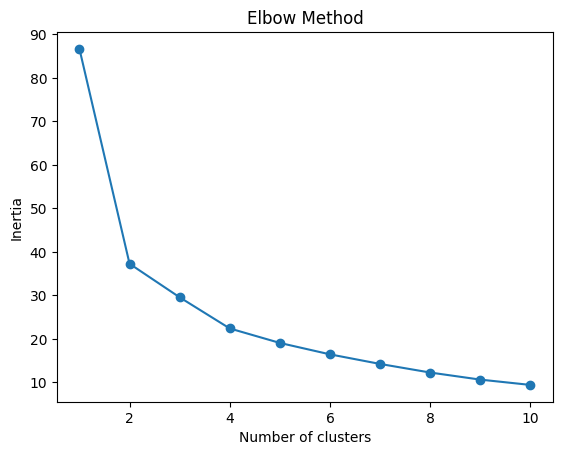

In [20]:
# Elbow analysis to determine an approximate optimal value of K - (which is the number of clusters we will use)
# Kmeans with feature scaling
from sklearn.cluster import KMeans
df
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 10000, random_state = 0, n_init = 10)
    kmeans = kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker = "o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [21]:
# Training the actual model that we will use
# Decided that K = 5 was optimal 
# That is it has a relatively low inertia, it is not too large and divides 200 perfectly,
# 200 is the number of customers/rows of data in our dataset
kmeans = KMeans(n_clusters = 5, init = "k-means++", max_iter = 10000, random_state = 0, n_init = 10)
kmeans = kmeans.fit(df)

In [22]:
kmeans

KMeans(max_iter=10000, n_clusters=5, n_init=10, random_state=0)

In [23]:
# Saving the model
# Saving the scalar that we fitted 
# We will use it later to scale the user inputs 
# So that our model is able work on data with the appropriate range values
pickle.dump(kmeans, open("model.pkl", "wb"))
pickle.dump(min_max, open("scaler.sav", 'wb'))